In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
import sklearn
import time
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.feature_selection import f_regression
from sklearn.linear_model  import LogisticRegression
from sklearn import linear_model

telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_cust.shape

(7043, 21)

In [3]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.dropna(axis=0, how='any',inplace = True)
telecom_cust.head()
telecom_cust.shape

(7032, 21)

In [4]:
df2 = telecom_cust.iloc[:,1:21]
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [5]:
df_dummies = pd.get_dummies(df2)
df_dummies.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [6]:
x = df_dummies.drop(columns=['Churn'])
y = df_dummies ['Churn']

<font size = 5>使用CORR套件先看一下相關性</font>

<Axes: >

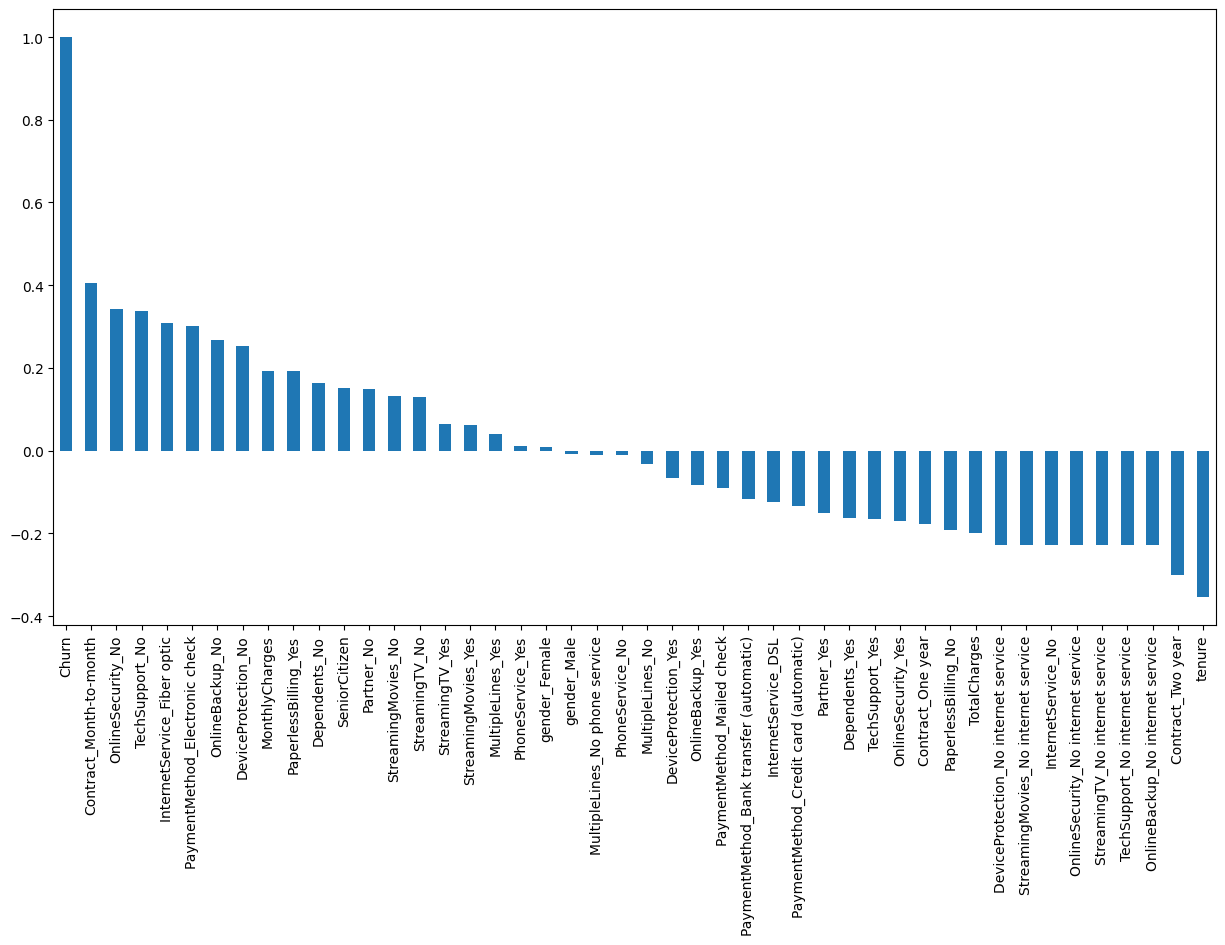

In [7]:
#Get Correlation of "Churn" with other variables:
fig=plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [8]:
import plotly.express as px
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

<font size = 5>顧客是否流失長條圖</font>

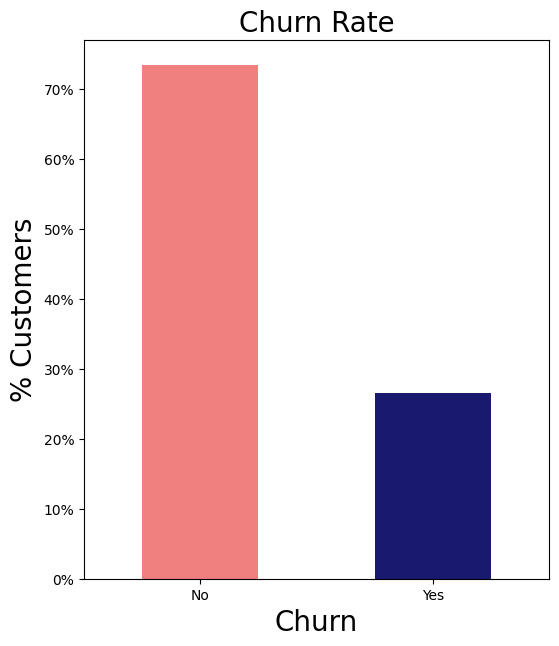

In [9]:
colors =  ['#F08080','#191970']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                        stacked = True,
                                                                        rot = 0,
                                                                        color = colors,
                                                                        figsize = (6,7))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 20)
ax.set_xlabel('Churn',size = 20)
ax.set_title('Churn Rate', size = 20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)


<font size = 5>顧客簽合約期和停留月數長條圖</font>

C:\Users\dtwostar\AppData\Local\Temp\ipykernel_11556\3862085493.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\dtwostar\AppData\Local\Temp\ipykernel_11556\3862085493.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\dtwostar\AppData\Local\Temp\ipykernel_11556\3862085493.py:22: UserWarning:



`d

Text(0.5, 1.0, 'Two Year Contract')

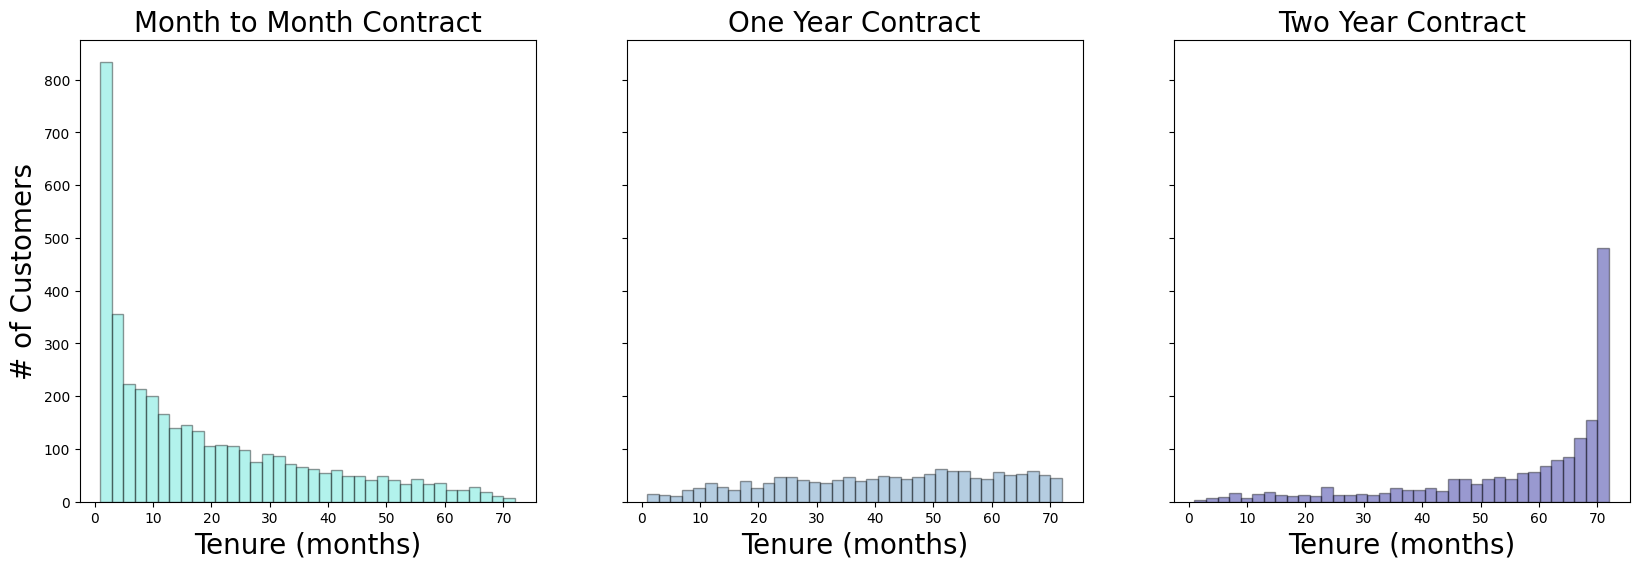

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers',size = 20)
ax.set_xlabel('Tenure (months)',size = 20)
ax.set_title('Month to Month Contract',size = 20)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 20)
ax.set_title('One Year Contract',size = 20)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size = 20)
ax.set_title('Two Year Contract',size = 20)

<font size = 5>顧客每月付費和是否流失線圖</font>

C:\Users\dtwostar\AppData\Local\Temp\ipykernel_11556\2862132292.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\dtwostar\AppData\Local\Temp\ipykernel_11556\2862132292.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of monthly charges by churn')

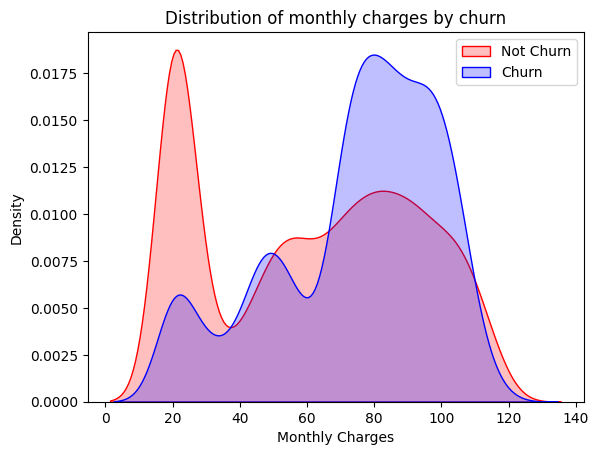

In [11]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

<font size = 5>顧客總付費和是否流失線圖</font>

C:\Users\dtwostar\AppData\Local\Temp\ipykernel_11556\3097405637.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\dtwostar\AppData\Local\Temp\ipykernel_11556\3097405637.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of total charges by churn')

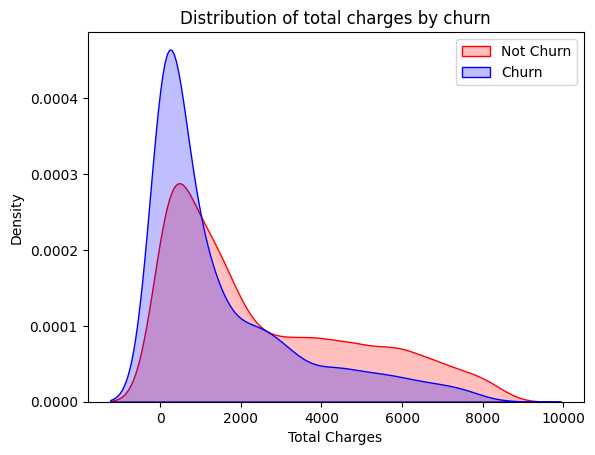

In [12]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [13]:
#切割訓練和測試集
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, test_size = 0.2, random_state = 0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

model=linear_model.LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

#predict返回的是一個預測的值
print(model.predict(x_test))
#predict_proba返回的是對於預測為各個類別的概率
print(model.predict_proba(x_test))

Number transactions x_train dataset:  (5625, 45)
Number transactions y_train dataset:  (5625,)
Number transactions x_test dataset:  (1407, 45)
Number transactions y_test dataset:  (1407,)
[1 0 0 ... 0 0 0]
[[0.34830866 0.65169134]
 [0.55908039 0.44091961]
 [0.99071199 0.00928801]
 ...
 [0.67259616 0.32740384]
 [0.995081   0.004919  ]
 [0.81809636 0.18190364]]


c:\Users\dtwostar\anaconda3\envs\Logist_regression_example_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

start_Time_GS = time.time()

grid = {
    'C': np.linspace(0.0,0.5,100)
     , 'solver': ['lbfgs','liblinear','sag']
}

#預設為1.0
#正則項與損失函數的比值為1:1
#C越小則損失函數會越小，模型對損失函數的懲罰越重，正則化的效力越強
#參數θ(w)會逐漸壓縮得越來越小
#C概念教學影片
#https://www.youtube.com/watch?v=TmzzQoO8mr4&ab_channel=%E8%8E%AB%E7%83%A6Python

#‘newton-cg’ - [‘l2’, ‘none’]
#‘lbfgs’ - [‘l2’, ‘none’]
#‘liblinear’ - [‘l1’, ‘l2’]
#‘sag’ - [‘l2’, ‘none’]
#‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]
#LogisticRegression參數官網
#http://www.taroballz.com/2018/07/18/ML_LogisticRegression/

GSmodel=LogisticRegression(penalty='l2',random_state=100, max_iter=1000, tol=10,class_weight='balanced')

#penalty：懲罰項 str類型，默認爲l2。newton-cg、sag和lbfgs求解算法只支持L2規範,L2假設的模型參數滿足高斯分佈。
#max_iter：算法收斂最大迭代次數，int類型，默認爲10。僅在正則化優化算法爲newton-cg, sag和lbfgs纔有用，算法收斂的最大迭代次數。
#tol：停止求解的標準，float類型，默認爲1e-4。就是求解到多少的時候，停止，認爲已經求出最優解。
#class_ weight：用於標示分類模型中各種類型的權重，可以是一個字典或者’balanced’字符串，默認爲不輸入，也就是不考慮權重，即爲None。
#               如果選擇輸入的話，可以選擇balanced讓類庫自己計算類型權重，或者自己輸入各個類型的權重。

gs = GridSearchCV(GSmodel, grid, scoring='roc_auc', cv=3,verbose=10)

#cv :交叉驗證參數，默認None，使用三折交叉驗證。指定fold數量，默認爲3，也可以是yield訓練/測試數據的生成器。
#verbose：日誌冗長度，int：冗長度，0：不輸出訓練過程，1：偶爾輸出，>1：對每個子模型都輸出。
#scoring : 精度評價方式设定
gs.fit(x_train,y_train)
end_Time_GS = time.time()

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV 1/3; 1/300] START C=0.0, solver=lbfgs.......................................
[CV 1/3; 1/300] END ..........C=0.0, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3; 1/300] START C=0.0, solver=lbfgs.......................................
[CV 2/3; 1/300] END ..........C=0.0, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3; 1/300] START C=0.0, solver=lbfgs.......................................
[CV 3/3; 1/300] END ..........C=0.0, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3; 2/300] START C=0.0, solver=liblinear...................................
[CV 1/3; 2/300] END ......C=0.0, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3; 2/300] START C=0.0, solver=liblinear...................................
[CV 2/3; 2/300] END ......C=0.0, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3; 2/300] START C=0.0, solver=liblinear...................................
[CV 3/3; 2/300] END ......C=0.0, solver=liblin

c:\Users\dtwostar\anaconda3\envs\Logist_regression_example_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


9 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dtwostar\anaconda3\envs\Logist_regression_example_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dtwostar\anaconda3\envs\Logist_regression_example_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "c:\Users\dtwostar\anaconda3\envs\Logist_regression_exam

<font size = 4>class_weight：用於標示分類模型中各種類型的權重，可以是一個字典或者’balanced’字符串，默認為不輸入，也就是不考慮權重，即為None。如果選擇輸入的話，可以選擇balanced讓類庫自己計算類型權重，或者自己輸入各個類型的權重。舉個例子，比如對於0,1的二元模型，我們可以定義class_weight={0:0.9,1:0.1}，這樣類型0的權重為90%，而類型1的權重為10%。如果class_weight選擇balanced，那麽類庫會根據訓練樣本量來計算權重。某種類型樣本量越多，則權重越低，樣本量越少，則權重越高。當class_weight為balanced時，類權重計算方法如下：n_samples / (n_classes * np.bincount(y))。n_samples為樣本數，n_classes為類別數量，np.bincount(y)會輸出每個類的樣本數，例如y=[1,0,0,1,1],則np.bincount(y)=[2,3]。<br>

https://stackoverflow.com/questions/30972029/how-does-the-class-weight-parameter-in-scikit-learn-work<br>
https://github.com/scikit-learn/scikit-learn/issues/4324</font>

In [15]:
#看各個特徵的斜率
FeatureList = x_train.columns.values.tolist()
weight = list(model.coef_[0])
grades = {
    "index" : np.arange(0,45,1),
    "Feature": FeatureList,
    "weight": weight
}
Feature_weight = pd.DataFrame(grades)
print(Feature_weight.head(5))

   index         Feature    weight
0      0   SeniorCitizen  0.224900
1      1          tenure -0.066621
2      2  MonthlyCharges  0.000299
3      3    TotalCharges  0.000405
4      4   gender_Female -0.017425


In [16]:
#排序後選取前後各11個特徵
Feature_weight.sort_values("weight",inplace=True)
Feature_index = Feature_weight.index.values.tolist()
Feature_index_chose = Feature_index[0:11] + Feature_index[-11:]
x_Feature_Selection = x.iloc[:,Feature_index_chose]
print(x_Feature_Selection.columns.values.tolist())

['Contract_Two year', 'InternetService_DSL', 'TechSupport_Yes', 'OnlineSecurity_Yes', 'Contract_One year', 'PaperlessBilling_No', 'MultipleLines_No', 'PhoneService_Yes', 'PaymentMethod_Mailed check', 'Dependents_Yes', 'PaymentMethod_Credit card (automatic)', 'StreamingTV_Yes', 'PhoneService_No', 'MultipleLines_No phone service', 'PaperlessBilling_Yes', 'OnlineBackup_No', 'OnlineSecurity_No', 'SeniorCitizen', 'TechSupport_No', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'Contract_Month-to-month']


In [17]:
#再一次切割選取特徵後的訓練和測試集
x_FS_train, x_FS_test, y_FS_train, y_FS_test = train_test_split(x_Feature_Selection,y, stratify = y, test_size = 0.2, random_state = 0)
model_FS=linear_model.LogisticRegression()
model_FS.fit(x_FS_train,y_FS_train)
y_FS_pred = model_FS.predict(x_FS_test)

In [18]:
start_Time_GSFS = time.time()

GS_FS_model=LogisticRegression(penalty='l2',random_state=100, max_iter=1000, tol=1,class_weight='balanced')
gs_FS = GridSearchCV(GS_FS_model, grid, scoring='roc_auc', cv=3,verbose=10)
gs_FS.fit(x_FS_train,y_FS_train)
gs_FS_y_pred = gs_FS.predict(x_FS_test)

end_Time_GSFS = time.time()

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV 1/3; 1/300] START C=0.0, solver=lbfgs.......................................
[CV 1/3; 1/300] END ..........C=0.0, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3; 1/300] START C=0.0, solver=lbfgs.......................................
[CV 2/3; 1/300] END ..........C=0.0, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3; 1/300] START C=0.0, solver=lbfgs.......................................
[CV 3/3; 1/300] END ..........C=0.0, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3; 2/300] START C=0.0, solver=liblinear...................................
[CV 1/3; 2/300] END ......C=0.0, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3; 2/300] START C=0.0, solver=liblinear...................................
[CV 2/3; 2/300] END ......C=0.0, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3; 2/300] START C=0.0, solver=liblinear...................................
[CV 3/3; 2/300] END ......C=0.0, solver=liblin

c:\Users\dtwostar\anaconda3\envs\Logist_regression_example_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


9 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dtwostar\anaconda3\envs\Logist_regression_example_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dtwostar\anaconda3\envs\Logist_regression_example_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "c:\Users\dtwostar\anaconda3\envs\Logist_regression_exam

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('logistic無調整參數調整')
print(cm)
print('訓練集: ', model.score(x_train,y_train))
print('測試集: ', model.score(x_test,y_test))
print('測試集的recall: %.3f' % recall_score(y_test,y_pred))

logistic無調整參數調整
[[931 102]
 [171 203]]
訓練集:  0.8058666666666666
測試集:  0.8059701492537313
測試集的recall: 0.543


In [20]:
GSy_pred = gs.predict(x_test)
GScm = confusion_matrix(y_test, GSy_pred)
print('logistic參數調整後')
print(GScm)
print('調整後訓練集: ', gs.score(x_train,y_train))
print('調整後測試集: ', gs.score(x_test,y_test))
print('測試集的recall: %.3f' % recall_score(y_test,GSy_pred))

logistic參數調整後
[[765 268]
 [ 79 295]]
調整後訓練集:  0.8464947727291132
調整後測試集:  0.8491155504708264
測試集的recall: 0.789


In [21]:
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("未做特徵選取執行時間：%f 秒" % (end_Time_GS - start_Time_GS))

tuned hpyerparameters :(best parameters)  {'C': 0.06060606060606061, 'solver': 'lbfgs'}
未做特徵選取執行時間：38.963556 秒


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_FS_test, y_FS_pred)
print('Feature_Selection調整(logistic無調整參數)')
print(cm)
print('訓練集: ', model_FS.score(x_FS_train,y_FS_train))
print('測試集: ', model_FS.score(x_FS_test,y_FS_test))
print('測試集的recall: %.3f' % recall_score(y_FS_test,y_FS_pred))

Feature_Selection調整(logistic無調整參數)
[[926 107]
 [179 195]]
訓練集:  0.7877333333333333
測試集:  0.7967306325515281
測試集的recall: 0.521


In [23]:
GScm = confusion_matrix(y_FS_test, gs_FS_y_pred)
print('Feature_Selection調整(logistic有調整參數)')
print(GScm)
print('調整後訓練集: ', gs_FS.score(x_FS_train,y_FS_train))
print('調整後測試集: ', gs_FS.score(x_FS_test,y_FS_test))
print('測試集的recall: %.3f' % recall_score(y_FS_test,gs_FS_y_pred))

Feature_Selection調整(logistic有調整參數)
[[743 290]
 [ 76 298]]
調整後訓練集:  0.8288872512896095
調整後測試集:  0.8344200216388589
測試集的recall: 0.797


In [24]:
print("After Feature_Selection tuned hpyerparameters :(best parameters) ",gs_FS.best_params_)
print("做特徵選取後執行時間：%f 秒" % (end_Time_GSFS - start_Time_GSFS))

After Feature_Selection tuned hpyerparameters :(best parameters)  {'C': 0.04040404040404041, 'solver': 'lbfgs'}
做特徵選取後執行時間：14.247908 秒


<h1>參考資料</h1>
<font size = 4> https://medium.com/marketingdatascience/%E9%80%8F%E9%81%8E%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E9%A0%90%E6%B8%AC-%E9%9B%BB%E4%BF%A1%E6%A5%AD-%E9%A1%A7%E5%AE%A2%E6%B5%81%E5%A4%B1%E7%8E%87-%E5%9F%BA%E7%A4%8E%E6%A6%82%E6%B3%81%E5%88%86%E6%9E%90-%E9%99%84python%E7%A8%8B%E5%BC%8F%E7%A2%BC-bde4b3fbad52</font>